In [1]:
!pip install -U altair

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
!pip install -U altair vega_datasets notebook vega

Requirement already up-to-date: altair in c:\users\aanand\appdata\local\programs\python\python38\lib\site-packages (4.1.0)
Requirement already up-to-date: notebook in c:\users\aanand\appdata\local\programs\python\python38\lib\site-packages (6.1.4)

ERROR: vega 3.4.0 has requirement pandas<2.0.0,>=1.0.0, but you'll have pandas 0.25.3 which is incompatible.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.



  Using cached https://files.pythonhosted.org/packages/56/a0/dbcf5881bb2f51e8db678211907f16ea0a182b232c591a6d6f276985ca95/ipywidgets-7.5.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/6c/7b/7ac231c20d2d33c445eaacf8a433f4e22c60677eb9776c7c5262d7ddee2d/widgetsnbextension-3.5.1-py2.py3-none-any.whl


In [1]:
import pandas as pd
import altair as alt

import vega
from vega import VegaLite
from vega_datasets import data

In [2]:
alt.__version__

'4.1.0'

In [3]:
vega.__version__

'3.4.0'

In [15]:
'''Enable jupyterlab - rendering will work only if the active rendered is default or jupyuterlab'''
alt.renderers.enable('jupyterlab')

RendererRegistry.enable('jupyterlab')

In [16]:
'''Print the names of all of the datsets'''
print(data.list_datasets())

['7zip', 'airports', 'annual-precip', 'anscombe', 'barley', 'birdstrikes', 'budget', 'budgets', 'burtin', 'cars', 'climate', 'co2-concentration', 'countries', 'crimea', 'disasters', 'driving', 'earthquakes', 'ffox', 'flare', 'flare-dependencies', 'flights-10k', 'flights-200k', 'flights-20k', 'flights-2k', 'flights-3m', 'flights-5k', 'flights-airport', 'gapminder', 'gapminder-health-income', 'gimp', 'github', 'graticule', 'income', 'iowa-electricity', 'iris', 'jobs', 'la-riots', 'londonBoroughs', 'londonCentroids', 'londonTubeLines', 'lookup_groups', 'lookup_people', 'miserables', 'monarchs', 'movies', 'normal-2d', 'obesity', 'ohlc', 'points', 'population', 'population_engineers_hurricanes', 'seattle-temps', 'seattle-weather', 'sf-temps', 'sp500', 'stocks', 'udistrict', 'unemployment', 'unemployment-across-industries', 'uniform-2d', 'us-10m', 'us-employment', 'us-state-capitals', 'volcano', 'weather', 'weball26', 'wheat', 'windvectors', 'world-110m', 'zipcodes']


In [17]:
'''Data is available at the specific url'''

data.unemployment_across_industries.url


'https://vega.github.io/vega-datasets/data/unemployment-across-industries.json'

In [18]:
'''FUnction to invoke to get the data in the form of pandas'''
unemployment_data = data.unemployment_across_industries()

unemployment_data.head(5)

,series,year,month,count,rate,date
0,Government,2000,1,430,2.1,2000-01-01 08:00:00+00:00
1,Government,2000,2,409,2.0,2000-02-01 08:00:00+00:00
2,Government,2000,3,311,1.5,2000-03-01 08:00:00+00:00
3,Government,2000,4,269,1.3,2000-04-01 08:00:00+00:00
4,Government,2000,5,370,1.9,2000-05-01 07:00:00+00:00


In [19]:
unemployment_data.shape

(1708, 6)

In [20]:
unemployment_data.columns

Index(['series', 'year', 'month', 'count', 'rate', 'date'], dtype='object')

In [21]:
unemployment_data['series'].unique()

array(['Government', 'Mining and Extraction', 'Construction',
       'Manufacturing', 'Wholesale and Retail Trade',
       'Transportation and Utilities', 'Information', 'Finance',
       'Business services', 'Education and Health',
       'Leisure and hospitality', 'Other', 'Agriculture', 'Self-employed'],
      dtype=object)

In [22]:
unemployment_data['year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010],
      dtype=int64)

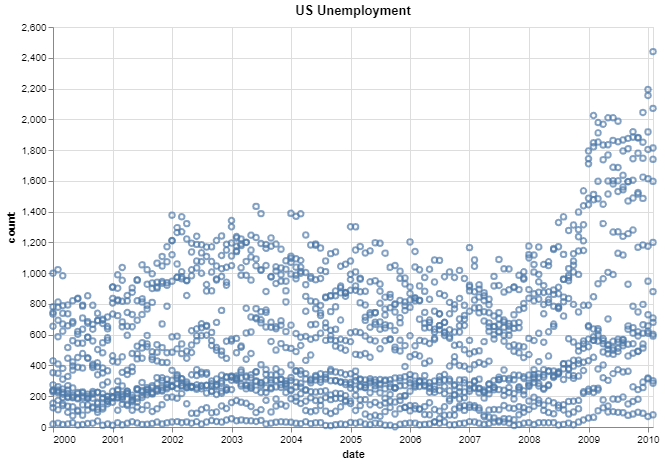

In [23]:
'''.markpoint() basically is a scatterplot and encoding refers to the data you want to present'''
alt.Chart(unemployment_data, height = 400, width = 600)\
    .mark_point() \
    .encode(x= 'date',
     y = 'count')\
    .properties(title='US Unemployment')

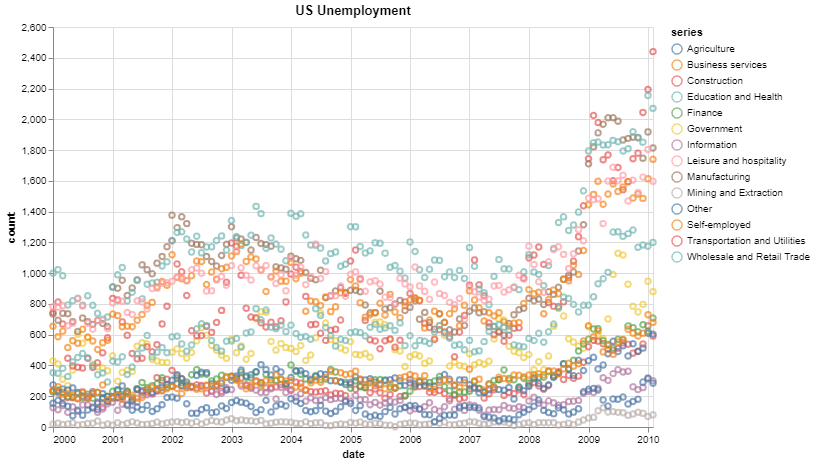

In [24]:
'''color of the data points to represent the sector information'''
alt.Chart(unemployment_data, height = 400, width = 600)\
    .mark_point() \
    .encode(x= 'date',
     y = 'count',
     color = 'series')\
    .properties(title='US Unemployment')

<h3> Based on the above graph -- seems like wholesale and retails trade has higher unemployment count. Its possible that there are more people working in that sector  </h3>

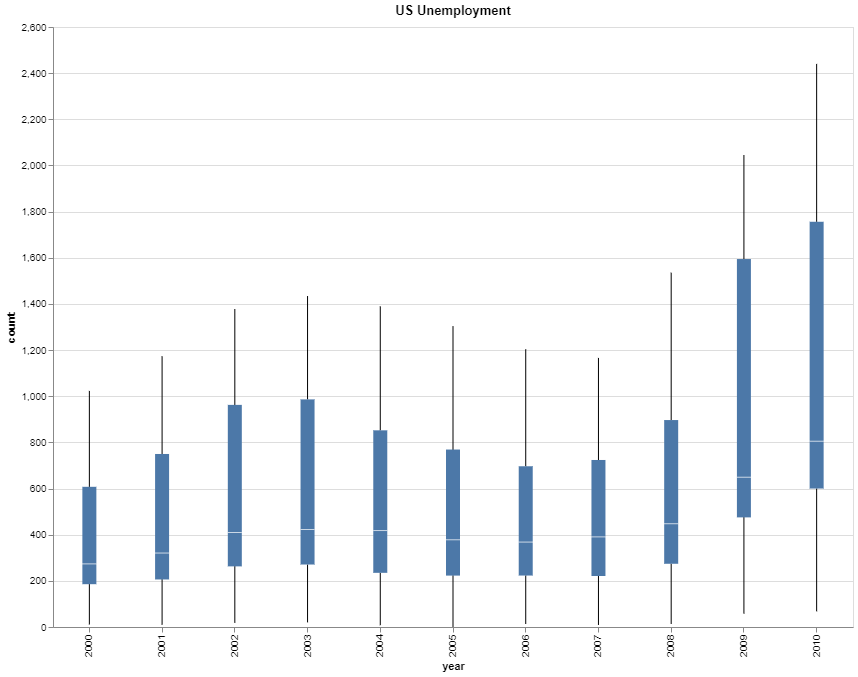

In [28]:
'''Boxplot representation. :O (colon O) represents that this is ordinal categorical data and :Q represents that its a numerical data '''
alt.Chart(unemployment_data, height = 600, width = 800)\
    .mark_boxplot(extent = 500) \
    .encode(x= 'year:O',
     y = 'count:Q')\
    .properties(title='US Unemployment')

<h3> According to above boxplot: 2007 was just before the finanical crisis hit and the unemployment count wass less but after the financial crisis in 2010 - the unemployment 
count was high </h3>

In [29]:
year_data = pd.DataFrame(unemployment_data.groupby('year', as_index=False)['count'].sum())

year_data

,year,count
0,2000,63093
1,2001,76097
2,2002,94107
3,2003,97592
4,2004,89559
5,2005,83101
6,2006,76613
7,2007,77405
8,2008,97888
9,2009,158759


<h3> Unemployment count was fairly high in 2008 and 2009 </h3>

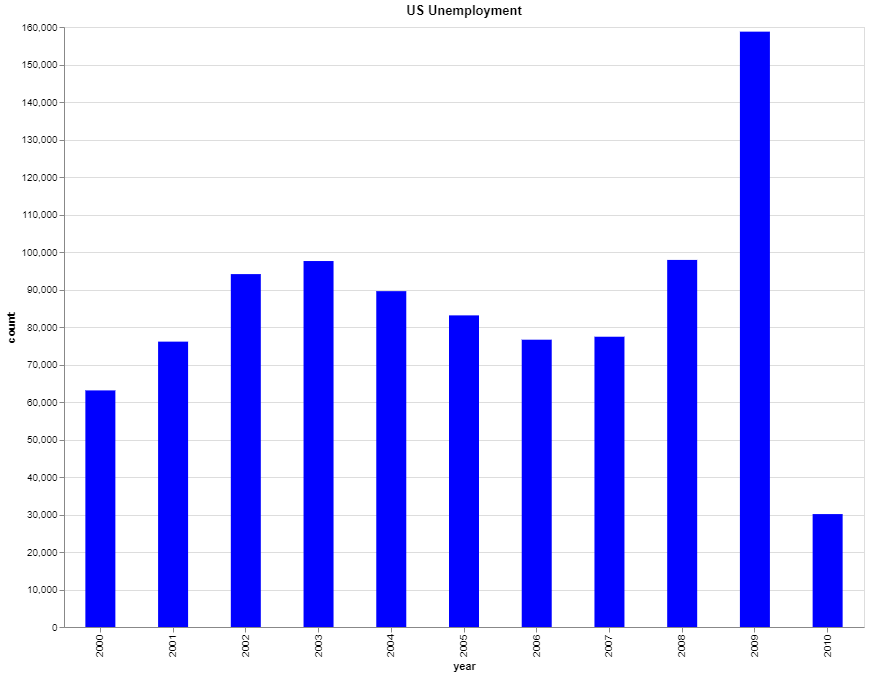

In [32]:
alt.Chart(year_data, height = 600, width = 800)\
    .mark_bar(color = 'blue', size = 30) \
    .encode(x= 'year:O',
     y = 'count:Q')\
    .properties(title='US Unemployment')